# Import needed packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score, train_test_split, StratifiedShuffleSplit
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler,Normalizer, OneHotEncoder, CategoricalEncoder
from sklearn import svm
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation 

## Stratify train test split

In [2]:
# read in and prepare X_train, y_train and X_test data
train=pd.read_csv('MLProjectData.csv')
X_target=pd.read_csv('testData.csv',index_col=0) # test data has index needed to remove

In [3]:
# Stratify the training test based on category variable ['cat1','cat2']

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(train, train[['cat1','cat2']]):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000216B18FB7F0>,
      dtype=object)

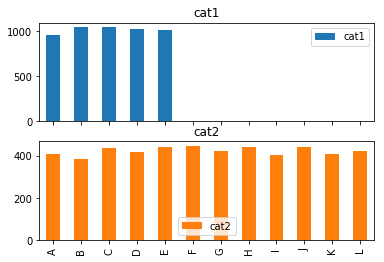

In [4]:
strat_train_set[['cat1','cat2']].apply(pd.value_counts).plot(kind='bar', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000216B1E4EC88>,
      dtype=object)

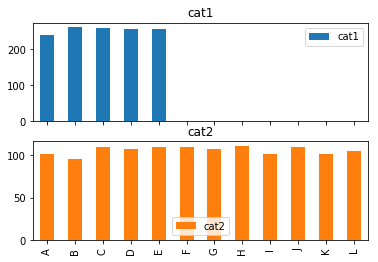

In [5]:
strat_test_set[['cat1','cat2']].apply(pd.value_counts).plot(kind='bar', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000216B20684E0>,
      dtype=object)

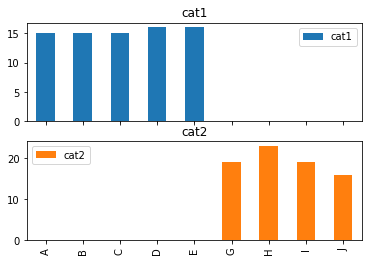

In [6]:
X_target[['cat1','cat2']].apply(pd.value_counts).plot(kind='bar', subplots=True)

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(training.drop('target', axis=1), training['target'],
#                                                     test_size=0.2, random_state=42,
#                                                    #stratify=['cat1','cat2']
#                                                    )

## check data for na value

In [9]:
train.isna().any().sum()
# train.info()

0

In [10]:
X_target.isna().any().sum()
# train.info()

0

In [11]:
# train.dropna(subset=['na feature'])
# train.drop('na feature', axis=1)
# train.['na feature'].fillna(median, inplace=True)

## Handeling Text and Categorical features

In [12]:
# # label to split the training and testing
# X_train['train']=True
# X_test['train']=False
# # get_dummies to encode categorical variables
# temp=pd.get_dummies(X_train.append(X_test,sort=False))
# X_train=temp[temp['train']==True].drop('train',axis=1)
# X_test=temp[temp['train']==False].drop('train',axis=1)

In [13]:
train_cat_encoded, train_categories = train['cat1'].factorize()

In [14]:
train_cat_encoded

array([0, 1, 0, ..., 2, 4, 1], dtype=int64)

In [15]:
train_categories

Index(['E', 'A', 'C', 'D', 'B'], dtype='object')

In [16]:
encoder = OneHotEncoder()

In [17]:
train_cat_1hot = encoder.fit_transform(train_cat_encoded.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [18]:
train_cat_1hot

<6350x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6350 stored elements in Compressed Sparse Row format>

In [19]:
type(train_cat_1hot)

scipy.sparse.csr.csr_matrix

In [20]:
train_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [24]:
encoder1 = OneHotEncoder()

In [31]:
cat2_1hot = encoder1.fit_transform(train[['cat2']])

In [32]:
cat2_1hot

<6350x12 sparse matrix of type '<class 'numpy.float64'>'
	with 6350 stored elements in Compressed Sparse Row format>

In [47]:
cat2_1hot.toarray()[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [34]:
encoder1.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
       dtype=object)]

In [42]:
train['cat2'].head()

0    D
1    G
2    K
3    L
4    B
Name: cat2, dtype: object

### CategoricalEncoder

In [23]:
cat_encoder = CategoricalEncoder()

RuntimeError: CategoricalEncoder briefly existed in 0.20dev. Its functionality has been rolled into the OneHotEncoder and OrdinalEncoder. This stub will be removed in version 0.21.

## Standardize/Normalize
for non tree models such as SVR

In [5]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)

norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
# normalize test data to output the result
X_test_norm = norm.transform(X_test)

# Benchmark 

## median and mean

In [96]:
y_train.describe()

count    6350.000000
mean       20.035933
std         1.419549
min         8.479981
25%        19.453096
50%        20.062500
75%        20.680000
max        32.849998
Name: target, dtype: float64

In [117]:
y_mean=np.repeat(y_train.mean(), len(y_train))
y_median=np.repeat(y_train.median(), len(y_train))
print('Benchmark\nMean:\nR2:',r2_score(y_train, y_mean)) 
print('MAE:',mae(y_train, y_mean)) 
print('Median:\nR2:',r2_score(y_train, y_median)) 
print('MAE:',mae(y_train, y_median)) 

Benchmark
Mean:
R2: 1.1102230246251565e-16
MAE: 0.9567985025831722
Median:
R2: -0.0003503183503301699
MAE: 0.9563565006299212


## kernel density

In [91]:
y_train_array = y_train.values[:,np.newaxis]

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(y_train_array)
kde.score_samples(y_train_array)

print('MAE:',mae(y_train_array,kde.sample(len(y_train_array)))) 

MAE: 1.4492191158844947


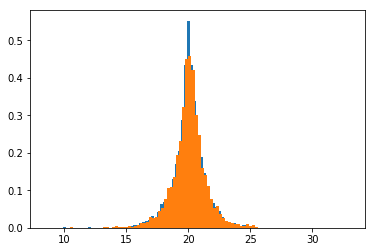

In [94]:
# Visualize the target
plt.hist(y_train,bins=100,density=0.5);
# y_train.quantile(q=0.05)
# y_train.quantile(q=0.95)
plt.hist(kde.sample(len(y_train_array)),bins=100,density=0.5);

# SVR

## Grid Search

In [37]:
# Dont run takes 90+ minutes

svr_grid = svm.SVR()

params_svr = {'C': [0.0001,0.001,0.005,0.1,0.3,0.5,1,3,5], 
              'gamma': [5,4,3,2,1.5,1,0.9,0.8,0.5],
              'kernel': ['rbf']}

grid_svr = GridSearchCV(svr_grid, params_svr,cv=10)
grid_svr.fit(X_train_norm, y_train)

# Print the MAE score
# print('Training MAE:', mae(y_train, grid_svr.best_estimator_.predict(X_train_norm)))

Training MAE: 0.9563635396782749


## Gridsearch results (candidates)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.5,
kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
  
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=5,
kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Cross Validation best model

### Standardized Data

In [6]:
svr_validate = svm.SVR(C=3,degree=3,gamma=0.9,kernel='rbf')

scores = cross_val_score(svr_validate, X_train_std, y_train, cv=10, scoring = 'neg_mean_absolute_error')
print(scores)
print(np.mean(scores))

[-0.98771723 -0.93132544 -1.00851058 -0.9137543  -0.89537944 -0.97483196
 -0.94677773 -0.99193567 -0.9394993  -0.97780779]
-0.9567539434416366


### Normalized Data (works better)

In [154]:
svr_validate = svm.SVR(C=3,degree=3,gamma=0.9,kernel='rbf')

scores = cross_val_score(svr_validate, X_train_norm, y_train, cv=10, scoring = 'neg_mean_absolute_error')
print(scores)
print(np.mean(scores))

[-0.9908526  -0.93328811 -1.0075597  -0.91038571 -0.88694411 -0.97235694
 -0.94409592 -0.99034215 -0.94005804 -0.97752778]
-0.9553411052541234


### Output result

In [30]:
result = svr_final.predict(X_test_norm)

(array([12., 31., 18.,  2.,  6.,  2.,  2.,  1.,  1.,  2.]),
 array([20.06090585, 20.06534632, 20.06978679, 20.07422726, 20.07866773,
        20.0831082 , 20.08754867, 20.09198914, 20.09642961, 20.10087008,
        20.10531055]),
 <a list of 10 Patch objects>)

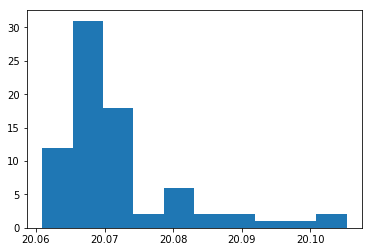

In [31]:
plt.hist(result)

In [32]:
len(result)

77

In [35]:
result.tofile('result.csv',sep='\n')

## PCA + SVR (unsuccessful try)

In [150]:
svr_grid = svm.SVR()

params_svr = {'C': [3,4,5,6,7,8], 
              'gamma': [5,4,3,2,1,0.5],
              'kernel': ['rbf']}

grid_svr = GridSearchCV(svr_grid, params_svr,cv=5)
grid_svr.fit(X_train_pca, y_train)

Training MAE: 0.11878177387367138


In [152]:
# Cross Validation
svr_validate = svm.SVR(C=4,degree=3,gamma=4,kernel='rbf')
# svr_validate = svm.SVR(gamma='auto')

scores = cross_val_score(svr_validate, X_train_pca, y_train, cv=10, scoring = 'neg_mean_absolute_error')
print(scores)
print(np.mean(scores))

[-0.9878083  -0.93158894 -1.00834542 -0.9140054  -0.89540323 -0.97501114
 -0.94688645 -0.99214737 -0.93950996 -0.9777393 ]
-0.9568445504223
